# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

*Joshua Salazar*


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

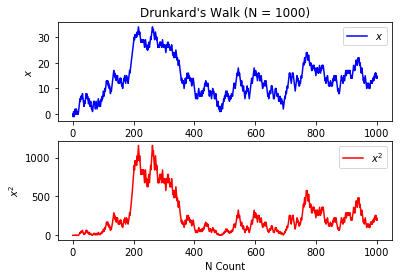

In [1]:
## Problem 1a: Using Python built-in number generator
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log, cos, sin, pi
from random import random, randrange, seed

seed(10) # random number seed
nSteps = 1000 # number of drunkard's walk steps
L = 1 # length of each drunkard step

# Generating random list of +- L steps
randList = []

for i in range(nSteps):
    randList.append(randrange(-L, L+1, 2))
    
# Accumulated Position and Squared Position List
xpos = [0]
for i in range(nSteps):
    xpos.append(randList[i] + xpos[i])
    
xposnp = np.array(xpos)
xposSqnp = xposnp**2

%matplotlib inline

plt.figure(1)
plt.subplot(211)
plt.plot(xposnp, 'b', label = "$x$")
plt.title("Drunkard's Walk (N = 1000)")
plt.ylabel("$x$")
plt.legend()

plt.subplot(212)
plt.plot(xposSqnp,'r', label = "$x^2$")
plt.xlabel("N Count")
plt.ylabel("$x^2$")
plt.legend()

plt.show()

### Problem 1b
This question has been revised for clarity.  

A useful quantity is the average of $x^2$ over all previous steps in the drunkard's walk. Call this $\langle x^2 \rangle_i$. For example, for the fifth step,  

$\langle x^2 \rangle_5 = \frac{1}{5}\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2\right)$.  

However, an even more useful quantity is the average of $\langle x^2 \rangle_i$ over an ensemble of many drunkards. For example, if we had three drunkards (Alice, Bob, and Charlie), then this quantity, $\langle \langle x^2 \rangle_i \rangle$, is  

$\langle \langle x^2 \rangle_i \rangle = \frac{1}{3}\left( \langle x^2 \rangle_i^A + \langle x^2 \rangle_i^B + \langle x^2 \rangle_i^C \right)$.  

For our purposes, pick nWalkers=100. This means that you will simulate nWalkers different random walks. The "average of $\langle x^2\rangle$ over walkers" gives an array of length nSteps where each element is an average of $\langle x^2 \rangle_i$ over the nWalker drunkards.
Your code should output:  

$\langle \langle x^2 \rangle_i\rangle = \frac{1}{n_\text{Walkers}} \sum_{a} \langle x^2\rangle_i^a$, where $a$ runs over the different drunkards.  

The resulting plot as a function of step number should look much better behaved. In fact, it should fit to  

$\langle \langle x^2 \rangle_i\rangle = 2 D t_i$,  

where $D$ is the diffusion constant. That is: this plot should be linear in step number. What is the value of $D$ based on your plot?

<x> =  -1.0137  <x^2> =  10638.88512


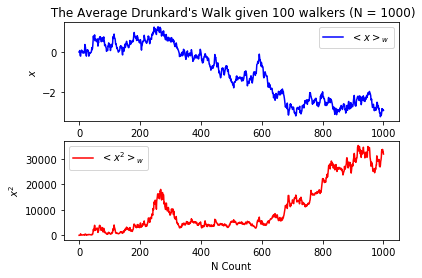

In [2]:
## Problem 1b
seed(10)
nWalkers = 100 # number of Drunkard's walk runs
nSteps = 1000
mu = 0 # starting positon
L = 1

# Generating x and x^2 list all Walkers

for i in range(nWalkers):
    
    # Generating list of random numbers
    randList = []
    for j in range(nSteps):
        randList.append(randrange(-L, L+1, 2))
    
    # Generating Position and Squared Position List over certain number of sets
    xpos = [mu]
    if i == 0:
        for j in range(nSteps):
            xpos.append(randList[j] + xpos[j])
        
        xlist = xpos
        xlistnp = np.array(xlist)
        xsqlist = xlistnp**2
        
    else:
        for j in range(nSteps):
            xpos.append(randList[j] + xpos[j])
            
        xlistnp = xlistnp + np.array(xpos)
        xsqlist = xsqlist + xlistnp**2
    

xlistmean = xlistnp/(nWalkers)
xsqlistmean = xsqlist/(nWalkers)

xtotmean = sum(xlistmean)/(nSteps)
xsqtotmean = sum(xsqlistmean)/(nSteps)
print("<x> = ", xtotmean,' <x^2> = ', xsqtotmean)

%matplotlib inline

plt.figure(1)
plt.subplot(211)
plt.plot(xlistmean, 'b', label = "$<x>_w$")
plt.title(" The Average Drunkard's Walk given 100 walkers (N = 1000)")
plt.ylabel("$x$")
plt.legend()

plt.subplot(212)
plt.plot(xsqlistmean,'r', label = "$<x^2>_w$")
plt.xlabel("N Count")
plt.ylabel("$x^2$")
plt.legend()

plt.show()

* If we assert that each N-step is 1 second, then the diffusion constant can be estimated to be about 5.3 position units per second.  
($ D = <x^2> / 2t$ $=$ $10639/(2*1000))$

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

< x > =  -1.0137 , < x ^2> =  10638.88512
< y > =  -2.32082 , < y ^2> =  28176.6972
< z > =  -0.78822 , < z ^2> =  8037.06308


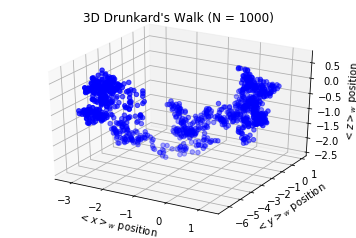

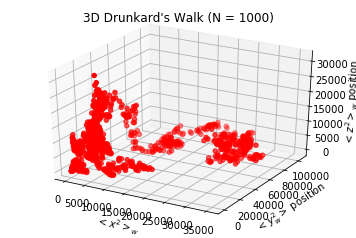

In [3]:
## Problem 1c
from mpl_toolkits.mplot3d import Axes3D

seed(10)
nWalkers = 100 # number of Drunkard's walk runs
nSteps = 1000
mu = 0 # starting positon
L = 1

def PosAndPossqMean(steps, runs, startpos, steplength, variable):
    """1D Random Walk. Yields ensemble mean of position x and x^2. the ensemble sizes 
    is set by the number of runs which is one of the inputs. Also need to specify integer steps for each run 
    and the ingeter length of each step."""

    # Generating x and x^2 list for all Walkers

    for i in range(runs):
    
        # Generating list of random numbers
        randList = []
        for j in range(steps):
            randList.append(randrange(-steplength, steplength+1, 2))
    
        # Generating Position and Squared Position List
        xpos = [startpos]
        if i == 0:
            for j in range(steps):
                xpos.append(randList[j] + xpos[j])
        
            xlist = xpos
            xlistnp = np.array(xlist)
            xsqlist = xlistnp**2
        
        else:
            for j in range(steps):
                xpos.append(randList[j] + xpos[j])
            
            xlistnp = xlistnp + np.array(xpos)
            xsqlist = xsqlist + xlistnp**2

    xlistmean = xlistnp/runs
    xsqlistmean = xsqlist/runs
    
    xtotmean = sum(xlistmean)/(nSteps)
    xsqtotmean = sum(xsqlistmean)/(nSteps)
    print('<',variable,'> = ', xtotmean,', <',variable,'^2> = ', xsqtotmean)

    
    return xlistmean, xsqlistmean


xmean, xsqmean = PosAndPossqMean(nSteps, nWalkers, mu, L, 'x')
ymean, ysqmean = PosAndPossqMean(nSteps, nWalkers, mu, L, 'y')
zmean, zsqmean = PosAndPossqMean(nSteps, nWalkers, mu, L, 'z')

%matplotlib inline

fig1 = plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter(xmean, ymean, zmean, c ='b')
plt.title("3D Drunkard's Walk (N = 1000)")
plt.xlabel("$<x>_w$ position")
plt.ylabel("$<y>_w$ position")
fig1.gca(projection ='3d').set_zlabel("$<z>_w$ position")

fig2 = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter(xsqmean, ysqmean, zsqmean, c ='r')
plt.title("3D Drunkard's Walk (N = 1000)")
plt.xlabel("$<x^2>_w$")
plt.ylabel("$<y^2_w>$ position")
fig2.gca(projection ='3d').set_zlabel("$<z^2>_w$ position")

plt.show()

D should be about the same as the 1D drunkard walk. In general though...  

$<r^2> - <r>^2 = 2nDt$  

where "n" is the number of dimensions of the walk. This means that...

$<r^2> = <(x^2 + y^2 + z^2)> = <x^2> + <y^2> + <z^2>  

Since the starting position is zero for all axes and assuming that each time step is again 1 second ($t = 1000$), the D is thus...  

$ D = (<x^2> + <y^2> + <z^2>) /(6t)$  

Using this, D was calculated to be approximately 7.8 position units per second.

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

<IPython.core.display.Javascript object>


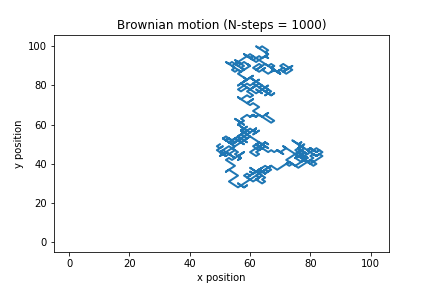

In [12]:
## Problem 2a

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Generating Random Walk
seed(10)
nruns = 1 # number of Drunkard's walk runs
nSteps = 1000
mu = 50 # starting positon
L = 1
boxLength = 101 # max length of both x and y dimensions


def xAndxsqBrownAnimate(steps, startpos, steplength, boxlimit):
    """1D Random Walk. This function is for animation. Yields position x and x^2 for random walk of one particle.
    Also need to specify the integer length of each step. limits on how 
    far a particle can travel are added through boxlimit x."""
    
    # list of random steps
    randList = []

    for i in range(steps):
        randList.append(randrange(-steplength, steplength+1, 2))
    
    # Accumulated Position and Squared Position List
    xpos = [startpos]
    for i in range(steps):
        if xpos[i] < boxlimit and xpos[i] > 0:
            xpos.append(randList[i] + xpos[i])
        else:
            if xpos[i] >= boxlimit:
                xpos.append(-steplength + xpos[i])
            elif xpos[i] <= 0:
                xpos.append(steplength + xpos[i])
    
    xposnp = np.array(xpos)
    xpossqnp = xposnp**2
    
    return xposnp, xpossqnp

xt = xAndxsqBrownAnimate(nSteps, mu, L, boxLength)[0]
yt = xAndxsqBrownAnimate(nSteps, mu, L, boxLength)[0]

# Animating resulting plot
%matplotlib notebook
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First we setup up figure we want to animate
fig2 = plt.figure(2)
ax = plt.axes(xlim=(-5, boxLength + 5), ylim=(-5, boxLength + 5))
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Brownian motion (N-steps = 1000)')
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function. This is called sequentially. We are animating the function we want to animate
def animate(i):
    x = xt[0:i]
    y = yt[0:i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig2, animate, init_func=init,
                               frames = nSteps , interval=10, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', writer= 'ffmpeg', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

* I had trouble saving the animation to a html5 tag nor a mp4 file. Please run code to see animations.

<IPython.core.display.Javascript object>


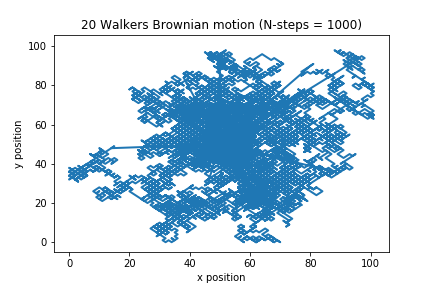

In [11]:
# Problem 2b

seed(10)
nwalkers = 20 # number of Drunkard's walkers
nSteps = 1000
mu = 50 # starting positon
L = 1
boxLength = 101 # max length of both x and y dimensions

def xAndxsqBrownAnimateMult(steps, startpos, numwalkers, steplength, boxlimit):
    """1D Random Walk. This function is for animation. Yields position x and x^2 for random walk of multiple particles. The
    number of particles is set by numwalkers. The total walk for each walker is appended at the end of the walk for the walker before it.
    Also need to specify the integer length of each step. limits on how 
    far a particle can travel are added through boxlimit x."""
    for j in range(numwalkers):
        # List of random steps
        randList = []
        for i in range(steps):
            randList.append(randrange(-steplength, steplength+1, 2))
    
        # Accumulated Position and Squared Position List
        if j == 0:
            xpostot = []
        xpos = [startpos]
        for i in range(steps):
            if xpos[i] < boxlimit and xpos[i] > 0:
                xpos.append(randList[i] + xpos[i])
            else:
                if xpos[i] >= boxlimit:
                    xpos.append(-steplength + xpos[i])
                elif xpos[i] <= 0:
                    xpos.append(steplength + xpos[i])
        
        xpostot.append(xpos)
   
    xpostotnp = np.array(xpostot)
    xpossqnp = xposnp**2
    
    return xpostotnp, xpossqnp
    

xt = xAndxsqBrownAnimateMult(nSteps, mu, nwalkers, L, boxLength)[0]
yt = xAndxsqBrownAnimateMult(nSteps, mu, nwalkers, L, boxLength)[0]

# Animating resulting plot
%matplotlib notebook
# First we setup up figure we want to animate
fig2 = plt.figure(2)
ax = plt.axes(xlim=(-5,boxLength + 5), ylim=(-5, boxLength + 5))
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('20 Walkers Brownian motion (N-steps = 1000)')
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function. This is called sequentially. We are animating the function we want to animate
def animate(i):
    x = xt[0:nwalkers, 0:i]
    y = yt[0:nwalkers, 0:i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig2, animate, init_func=init,
                               frames = nSteps , interval=10, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', writer= 'ffmpeg', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

* I had trouble saving the animation to a html5 tag nor a mp4 file. Please run code to see animations.

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

In [6]:
# Problem 3 

seed(10)
from math import pi

N = 100000 # number of marbles
n = 6 # n-dimensions
count = 0
Vlist = []
V = 0.0
for k in range(2, n + 1):
    V = 0.0
    count = 0
    for i in range(N +1):
        xsqtot = 0.0        
        for j in range(k):
            x = random()
            xsqtot = x**2 + xsqtot
    
        if xsqtot < 1:
            count += 1
    
    V = (count)/N
    Vlist.append(V)

print(Vlist)

[0.78598, 0.52576, 0.30931, 0.16568, 0.08092]


* This list is the calculated volume for n-dimensional unit hypersphere for n= 2,3,4,5,6 respectively. These volumes seem to be off from the analytical hypervolumes for unit sphere (2, 3.14, 4.189, 4.93, 5.21, 5.168). This indicates another condition or factor needs to be included in monte carlo integration.